# SWATNET School 1: Introduction to Space Weather
# AI Lecture 2

This is a jupyter notebook designed for the AI Lecture 2 of the SWATNET School 1 in Novmember 2021 (https://swatnet.eu/school-1-introduction-to-space-weather/). 

It will help you to get familiar with some basic coding skills to build a machine learning model to solve space weather problems using Support Vector Machines (SVM).

Any question? Contact me via j.liu@qub.ac.uk. 

## References:

* Liu et al. ApJ, 855, 109, 2018 https://iopscience.iop.org/article/10.3847/1538-4357/aaae69

* scikit-learn https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm


## Requirements

You can run this code directly via mybinder.org. If you prefer to run it on your local machine, you need to have a working Python3 environment. The easiest and most common option is to install Anaconda (https://www.anaconda.com/) to allow you to run Python in different platforms.

You will also need to install some neccessary Python packages including pandas, openpyxl, numpy, matplotlib and scikit-learn. For example, if you have Anaconda installed, run the following code in your terminal to install them to your base Python environment:

    $ source activate root

    $ conda install pandas, numpy, scikit-learn, openpyxl, matplotlib

If you don't have Anaconda and don't mind risking to mess up your operation system, you may use pip to install the above packages (**not recommended for starters**).

**More information about scikit-learn, specifically about SVM, is available at https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm**


## Data Preparation
"data.xlsx" contains the information of 182 geo-effective Coronal Mass Ejections. Please refer to the tutorial slides on how this information was obtained. 

Each row represents for an event (entry) and each volumn represents for a parameter (feature) of every event. The last column represents for the transit time of each event.

Our target is to use the parameters of these events as the input *x*, to build a SVM model which will predict the transit time *y* (label).

First of all, we define the data file

In [1]:
datafile = './data.xlsx'

Use pandas to load the data

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel(datafile, sheet_name='Data Original')

Have a look at the actual data

In [4]:
data

,CME Angular Width,CME Average Speed,CME Final Speed,CME Mass,CME Position Angle,CME Source Region Latitude,CME Source Region Longitude,Solar Wind Bx,Solar Wind By,Solar Wind Bz,Solar Wind Density,Solar Wind He Proton Ratio,Solar Wind Latitude,Solar Wind Longitude,Solar Wind Plasma Beta,Solar Wind Pressure,Solar Wind Speed,Solar Wind Temperature,Transit Time
0,360,104,119,820000000000000,269,20.6,18.7,-2.7857,1.0857,-1.3857,8.6000,0.0093,-0.4286,-0.9000,4.0300,1.8257,353.1429,24150.2857,101.936944
1,360,371,460,1700000000000000,67,23.4,-9.4,-3.8429,-0.2000,0.9286,6.6571,0.0420,-1.4000,2.3286,1.4114,2.3900,428.5714,80589.5714,102.490278
2,360,359,404,4000000000000000,87,24.2,2.0,-1.2143,2.5857,-2.4429,4.8857,0.0397,-0.4857,4.9286,2.2043,2.1600,477.8571,187698.8571,71.840833
3,174,293,524,2900000000000000,130,-36.4,1.2,-0.8143,-4.2143,-1.3143,11.0571,0.0180,-0.1143,-1.7714,2.3914,2.0343,319.5714,23119.5714,96.727778
4,360,503,573,8200000000000000,305,11.2,17.6,-0.1857,-0.5000,1.8571,24.9714,0.0177,-5.9571,-5.1429,3.8900,5.6057,355.7143,58948.7143,72.552778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,194,782,752,9000000000000000,241,-29.5,71.7,-2.2429,1.6429,-0.0857,6.6000,0.0116,-1.6714,-3.0286,4.3557,1.0614,303.4286,19396.4286,77.698889
178,204,647,698,7700000000000000,234,-29.7,29.9,-2.6000,5.6857,-1.0143,4.9429,0.0244,0.2571,-2.4000,0.6714,1.4714,402.5714,43830.7143,64.915278
179,131,823,1196,7800000000000000,188,3.5,-17.7,-1.3000,4.1429,-1.4143,8.2571,0.0283,-1.1571,-4.3286,1.7429,2.5243,404.1429,50583.7143,48.448333
180,360,817,873,12000000000000000,206,-11.0,27.0,2.9000,-1.6857,0.2714,5.9286,0.0150,0.6714,-1.2714,2.2329,2.0629,417.7143,64258.4286,63.231389


Before building the SVM model, it is a good idea to do feature selection, i.e., to omit "irrelevant" features in the input space. Please see Section 3.2 in Liu et al. ApJ, 855, 109, 2018 for more details.

We have found out that the most relevant features are:

In [5]:
features = ['CME Average Speed',
            'CME Final Speed',
            'CME Angular Width',
            'CME Mass',
            'Solar Wind Bz',
            'Solar Wind Speed',
            'Solar Wind Temperature',
            'Solar Wind Pressure',
            'Solar Wind Longitude',
            'Solar Wind He Proton Ratio',
            'Solar Wind Bx',
            'CME Position Angle'
            ]


Construct input x and label y

In [6]:
x = data[features]
y = data['Transit Time']

x, and y

In [7]:
x

,CME Average Speed,CME Final Speed,CME Angular Width,CME Mass,Solar Wind Bz,Solar Wind Speed,Solar Wind Temperature,Solar Wind Pressure,Solar Wind Longitude,Solar Wind He Proton Ratio,Solar Wind Bx,CME Position Angle
0,104,119,360,820000000000000,-1.3857,353.1429,24150.2857,1.8257,-0.9000,0.0093,-2.7857,269
1,371,460,360,1700000000000000,0.9286,428.5714,80589.5714,2.3900,2.3286,0.0420,-3.8429,67
2,359,404,360,4000000000000000,-2.4429,477.8571,187698.8571,2.1600,4.9286,0.0397,-1.2143,87
3,293,524,174,2900000000000000,-1.3143,319.5714,23119.5714,2.0343,-1.7714,0.0180,-0.8143,130
4,503,573,360,8200000000000000,1.8571,355.7143,58948.7143,5.6057,-5.1429,0.0177,-0.1857,305
...,...,...,...,...,...,...,...,...,...,...,...,...
177,782,752,194,9000000000000000,-0.0857,303.4286,19396.4286,1.0614,-3.0286,0.0116,-2.2429,241
178,647,698,204,7700000000000000,-1.0143,402.5714,43830.7143,1.4714,-2.4000,0.0244,-2.6000,234
179,823,1196,131,7800000000000000,-1.4143,404.1429,50583.7143,2.5243,-4.3286,0.0283,-1.3000,188
180,817,873,360,12000000000000000,0.2714,417.7143,64258.4286,2.0629,-1.2714,0.0150,2.9000,206


In [8]:
y

0      101.936944
1      102.490278
2       71.840833
3       96.727778
4       72.552778
          ...    
177     77.698889
178     64.915278
179     48.448333
180     63.231389
181     77.848889
Name: Transit Time, Length: 182, dtype: float64

## Normalisation

If you take a look at the data in the input *x*, you'll find that it contains positive and negative values which covers a huge range of orders of magnitude, from $10^{-3}$ in 'Solar Wind He Proton Ratio' to $10^{15}$ in 'CME Mass'.

It is usually a good and **neccessary** step to normalise your input data

In [9]:
y_in = y # there is no need to normalise the label in this case

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler() # standard scaler module in scikit-learn

In [12]:
x_in = scaler.fit_transform(x)

In [13]:
import numpy as np

In [14]:
np.shape(x_in), np.shape(y_in)

((182, 12), (182,))

In [15]:
x_in # have a look at the normalised input

array([[-1.45219016, -1.46079778,  0.62703543, ..., -1.37438361,
        -0.83526287,  0.80168636],
       [-0.96285351, -0.75497013,  0.62703543, ...,  0.03936176,
        -1.15865894, -1.13415583],
       [-0.98484616, -0.87088318,  0.62703543, ..., -0.06007598,
        -0.3545737 , -0.94248829],
       ...,
       [-0.13446336,  0.76845845, -2.15076884, ..., -0.55294134,
        -0.38078922,  0.02543281],
       [-0.14545969,  0.09988857,  0.62703543, ..., -1.12795093,
         0.90398519,  0.1979336 ],
       [-0.58164742, -0.96402759,  0.62703543, ..., -0.47944388,
         1.09189874,  1.42460588]])

We are now ready with the input and label.

## Kernal Selection

To build the SVM, we first identify that this is a regression problem, instead of a classification problem.

In this case, we need to use svm.SVR (https://scikit-learn.org/stable/modules/svm.html#svm-regression).

There are several different functions to map a linear SVR to a non-linear space to solve non-linear problems. We expect our problem to be non-linear, so need to select a function (called kernal). The mostly commonly used kernal function is the RBF (Radial Basis Function kernel):

$K(x_i, x_j) = \exp{(-\gamma ||x_i - x_j||^2)}$

where, $||x_i - x_j||^2$ is the squared Euclidean distance between two data points $x_i$ and $x_j$

"When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected." (https://scikit-learn.org/stable/modules/svm.html#svm-regression)

It is very important to choose proper values for C and $\gamma$. You can use the GridSearchCV() function in scikit-learn to find the proper values. 

For this particular problem, we have found a proper pair of C and $\gamma$ as C=32 and $\gamma$=0.012. See Section 3.4 and Figure 4 in Liu et al. ApJ, 855, 109, 2018 for more details.

In [16]:
C = 32
gamma = 0.012

## Trainning

Now, we randomly split the input data into two sets: the training set and the test set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, random_state=2)

In [19]:
np.shape(x_train), np.shape(x_test)

((136, 12), (46, 12))

In [20]:
np.shape(y_train), np.shape(y_test)

((136,), (46,))

Build the model

In [21]:
from sklearn import svm

In [22]:
clf = svm.SVR(C=C, gamma=gamma) # SVR model

In [23]:
clf.fit(x_train, y_train) # Build the model using the training data

SVR(C=32, gamma=0.012)

Use the model to predict the test set

In [24]:
yfit = clf.predict(x_test)

# Visualise the result

Check the R$^2$ score

In [25]:
R2 = clf.score(x_test, y_test)
R2

0.6328584379353159

Check the Mean Absolute Error (MAE)

In [26]:
MAE = np.mean(np.abs(yfit - y_test))
MAE

8.874299101712575

In [27]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Predicted Transit Time (hours)')

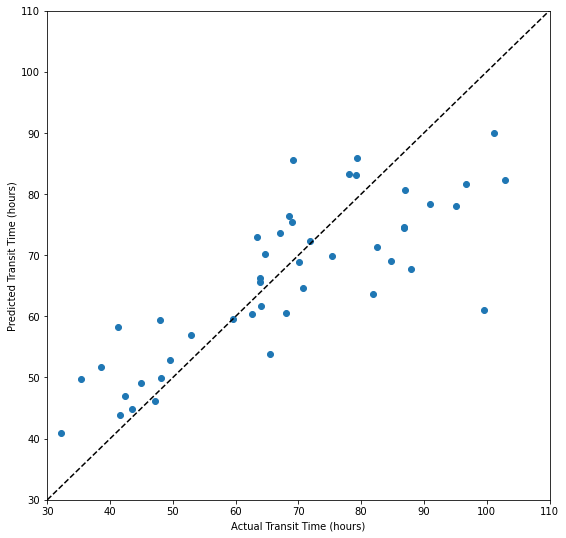

In [28]:
plt.figure(figsize=(9, 9))
plt.scatter(y_test, yfit)
plt.plot([30, 110], [30, 110], linestyle='--', color='black')

plt.xlim([30, 110])
plt.ylim([30, 110])

plt.xlabel('Actual Transit Time (hours)')
plt.ylabel('Predicted Transit Time (hours)')